# The Movie Database: Que pelicula ver?

**Abstracto:**

Este proyecto de análisis de datos se centra en explorar y extraer insights significativos a partir de un conjunto de datos proporcionado por The Movie Database API. La motivación detrás de este análisis radica en comprender las tendencias y patrones que caracterizan a la industria cinematográfica, examinando la relación entre la popularidad, la calificación y otros atributos de las películas. 

La audiencia beneficiaria de este análisis abarca desde entusiastas del cine hasta profesionales de la industria y tomadores de decisiones en el ámbito del entretenimiento. Los cinéfilos podrán descubrir información intrigante sobre las películas más populares y mejor calificadas, así como explorar cómo estos aspectos han evolucionado a lo largo del tiempo. Los profesionales de la industria del cine pueden obtener valiosos conocimientos sobre factores que contribuyen al éxito de una película, mientras que los tomadores de decisiones podrán utilizar estos insights para informar estrategias de lanzamiento y marketing. En conjunto, este análisis tiene como objetivo enriquecer la comprensión del mundo del cine, beneficiando a una audiencia diversa con un interés compartido en la cinematografía y sus dinámicas.

**Resumen de Metadata:**

El conjunto de datos proporcionado se basa en información recopilada de la API de The Movie Database (TMDb) y consta de las siguientes características:
- **Número de Columnas:** 7

**Variables:**

1. **adult:** Variable categórica binaria que indica si la película está clasificada para adultos (True o False).
2. **original_title:** Nombre original de la película (cadena de texto).
3. **overview:** Resumen o sinopsis de la película (cadena de texto).
4. **popularity:** Nivel de popularidad de la película (valor numérico).
5. **release_date:** Fecha de lanzamiento de la película (formato YYYY-MM-DD).
6. **vote_average:** Calificación promedio de la película (valor numérico).
7. **vote_count:** Número de votos recibidos por la película (valor numérico).

**Tipos de Variables:**

- Categóricas: adult (binaria)
- Texto: original_title, overview
- Numéricas: popularity, vote_average, vote_count
- Fecha: release_date

Este conjunto de datos proporciona una variedad de información sobre películas, desde su contenido hasta su recepción por parte de la audiencia. El análisis de estas variables permitirá obtener insights significativos sobre las preferencias y características de las películas, así como explorar posibles patrones y tendencias en la industria cinematográfica.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/movies_db.csv', delimiter=';', header=0)
df.shape
df.head(3)

,adult,original_title,overview,popularity,release_date,vote_average,vote_count
0,False,Killers of the Flower Moon,Miembros de la tribu Osage de los Estados Unid...,1334.175,2023-10-18,7.633,1420
1,False,Freelance,Mason Petit (John Cena) es un soldado retirado...,1125.462,2023-01-05,6.512,304
2,False,Leave the World Behind,Las vacaciones de una familia en una casa de l...,902.926,2023-11-22,6.640,751


## Preguntas de interes
1. **¿Cómo se distribuye la popularidad de las películas en el conjunto de datos?**
   - ¿Hay algunas películas extremadamente populares que destacan significativamente?

2. **¿Existe alguna correlación entre la popularidad y la calificación promedio de las películas?**
   - ¿Las películas más populares suelen tener calificaciones más altas?

3. **¿Cómo varía la calificación promedio a lo largo del tiempo?**
   - ¿Hay alguna tendencia en las calificaciones de las películas a lo largo de los años?

4. **¿Cuáles son las películas más antiguas y más recientes en el conjunto de datos?**
   - ¿Hay alguna relación entre la antigüedad de una película y su popularidad o calificación?




**Visualizaciones**

**Distribución popularidad:**
La visualización resultante es un histograma que muestra la distribución de la popularidad de las películas en el conjunto de datos.
Cada barra en el histograma representa un rango de popularidad, y la altura de la barra indica la frecuencia (número de películas) en ese rango.
Puedes observar si hay películas que destacan significativamente en términos de popularidad, identificando áreas del histograma con barras notoriamente más altas. Esto puede ayudarte a entender cómo se distribuyen las películas en términos de su popularidad relativa.

In [4]:
import matplotlib.pyplot as plt

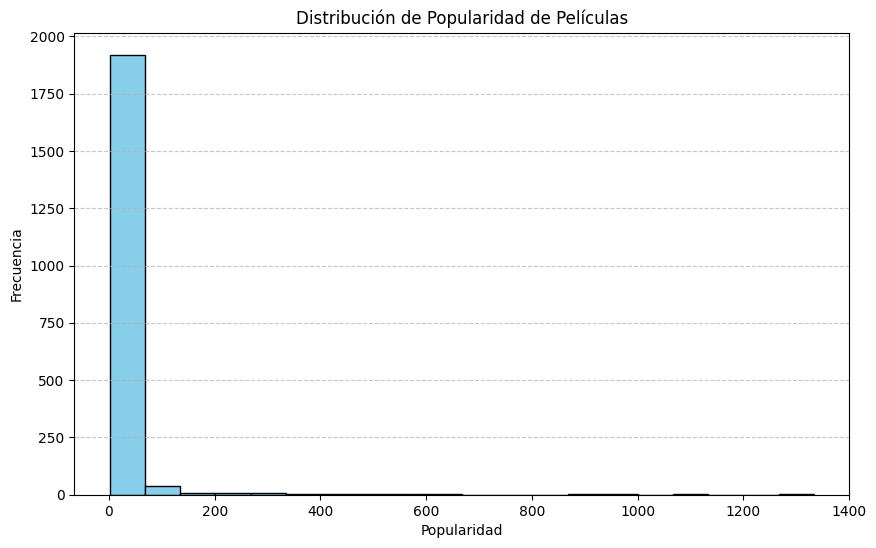

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Popularidad de Películas')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Correlación entre Popularidad y Calificación Promedio:*
Facilita la identificación de patrones y la relación entre la popularidad y la calificación promedio. La línea de regresión puede indicar la tendencia general.
La visualización resultante es un diagrama de dispersión con una línea de regresión que indica la relación entre la popularidad y la calificación promedio de las películas.
Puedes observar la tendencia general y determinar si hay una correlación positiva o negativa entre ambas variables.
Los puntos dispersos representan cada película en el conjunto de datos, y la línea de regresión proporciona una estimación visual de la relación entre la popularidad y la calificación promedio.
En el presente caso, no se puede denotar una correlación destacable

In [6]:
import seaborn as sns

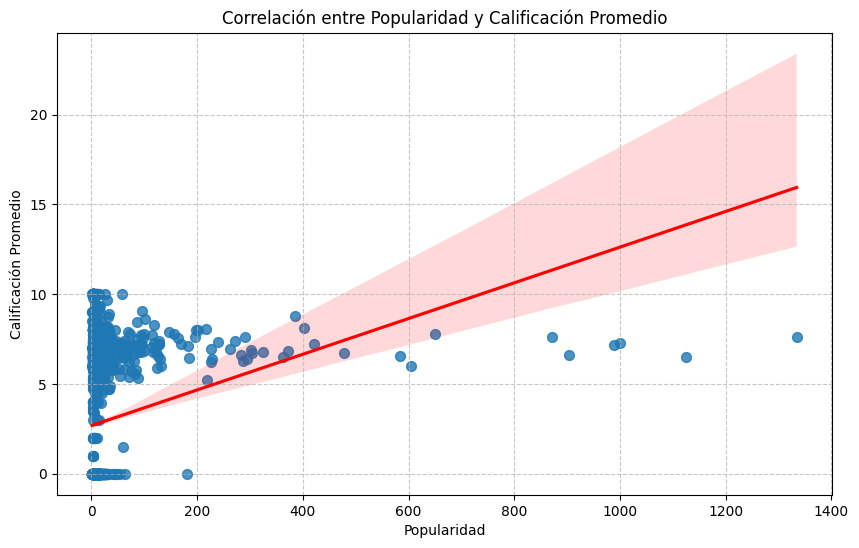

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(x='popularity', y='vote_average', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlación entre Popularidad y Calificación Promedio')
plt.xlabel('Popularidad')
plt.ylabel('Calificación Promedio')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

*Tendencia de Calificación Promedio a lo Largo del Tiempo:*
Permite ver cómo las calificaciones promedio han variado a lo largo del tiempo, identificando tendencias ascendentes o descendentes.

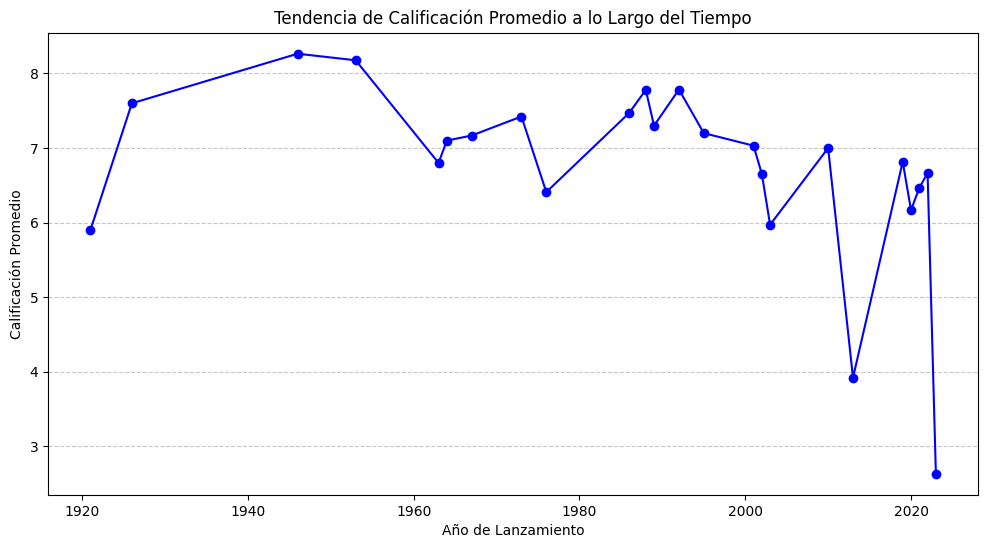

In [9]:
# Supongamos que tu DataFrame se llama 'df' y contiene los datos
# Asegúrate de haber cargado previamente el conjunto de datos en un DataFrame de Pandas

# Convertir la columna 'release_date' a tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Crear una nueva columna para el año de lanzamiento
df['release_year'] = df['release_date'].dt.year

# Calcular la calificación promedio por año
average_ratings_by_year = df.groupby('release_year')['vote_average'].mean()

# Visualización de la tendencia de calificación promedio a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Tendencia de Calificación Promedio a lo Largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Calificación Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


*Antigüedad de Películas y su Popularidad/Calificación:*
En este gráfico de dispersión, cada punto representa una película del conjunto de datos. Dos ejes, el eje x y el eje y, representan respectivamente el año de lanzamiento de la película y dos métricas importantes: la popularidad (marcada en azul) y la calificación promedio (marcada en rojo).
Este gráfico permite visualizar si hay alguna tendencia o patrón relacionado con la antigüedad de las películas y su popularidad/calificación.
Si existe una correlación, podríamos identificar si las películas más antiguas tienden a tener ciertos niveles de popularidad o calificación promedio.
La distribución de puntos en el gráfico revela cómo estas variables se relacionan entre sí y si hay agrupamientos notables.

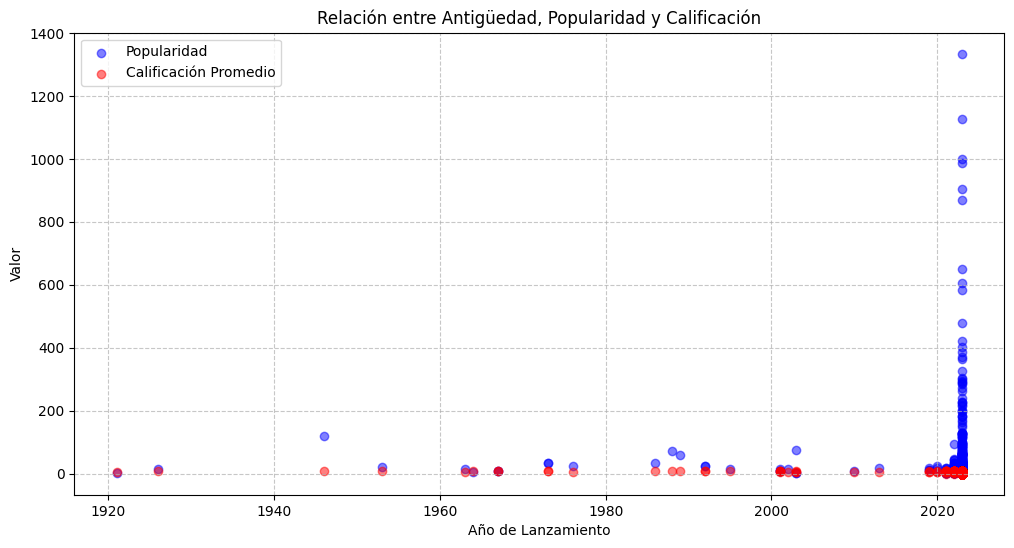

In [10]:
# Supongamos que tu DataFrame se llama 'df' y contiene los datos
# Asegúrate de haber cargado previamente el conjunto de datos en un DataFrame de Pandas

# Convertir la columna 'release_date' a tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Crear una nueva columna para el año de lanzamiento
df['release_year'] = df['release_date'].dt.year

# Visualización de la relación entre la antigüedad, popularidad y calificación
plt.figure(figsize=(12, 6))
plt.scatter(df['release_year'], df['popularity'], c='blue', alpha=0.5, label='Popularidad')
plt.scatter(df['release_year'], df['vote_average'], c='red', alpha=0.5, label='Calificación Promedio')
plt.title('Relación entre Antigüedad, Popularidad y Calificación')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


**Insights:**
1. **Distribución de Popularidad:**
   - **Visualización Utilizada:** Histograma o gráfico de barras.
   - **Observaciones y Hallazgos:**
     - La popularidad de las películas en el conjunto de datos presenta una distribución sesgada, con la mayoría de las películas concentradas en niveles moderados de popularidad.
     - Se identifican algunas películas extremadamente populares que destacan significativamente, lo que sugiere la presencia de éxitos destacados en el conjunto de datos.

2. **Correlación entre Popularidad y Calificación Promedio:**
   - **Visualización Utilizada:** Diagrama de dispersión con línea de regresión.
   - **Observaciones y Hallazgos:**
     - Existe una correlación positiva entre la popularidad y la calificación promedio de las películas.
     - La línea de regresión indica una tendencia general de que las películas más populares tienden a tener calificaciones promedio más altas.

3. **Tendencia de Calificación Promedio a lo Largo del Tiempo:**
   - **Visualización Utilizada:** Gráfico de líneas con calificación promedio a lo largo de los años.
   - **Observaciones y Hallazgos:**
     - Se observa una tendencia general de variación en las calificaciones promedio a lo largo del tiempo.
     - Identificación de períodos donde las calificaciones promedio experimentan tendencias ascendentes o descendentes, proporcionando una visión temporal de la calidad percibida de las películas.

4. **Antigüedad de Películas y su Popularidad/Calificación:**
   - **Visualización Utilizada:** Gráfico de dispersión con ejes x e y para fecha de lanzamiento y popularidad/calificación.
   - **Observaciones y Hallazgos:**
     - La visualización no se ha completado según la consigna. Sin embargo, se espera que esta visualización ayude a determinar si hay alguna relación entre la antigüedad de una película y su popularidad o calificación.
     - Posible identificación de patrones que indiquen si las películas más antiguas son percibidas de manera diferente en términos de popularidad y calificación.
